# Messing around with the Data

In [1]:
import pandas as pd

In [44]:
dep_val = pd.read_csv("City_of_Seattle_Wage_Data.csv")

In [45]:
dep_val

,Department,Last Name,First Name,Job Title,Hourly Rate
0,Office of Housing,Gould,Ian,Property Rehab Spec,47.080
1,Office of Housing,Kremer,Madison,"Com Dev Spec,Sr",56.390
2,Office of Housing,Wolff,Sandra,"Dev Fin Spec,Sr",50.200
3,Office of Housing,Barker,Lacey,"Com Dev Spec,Sr",58.650
4,Office of Housing,Laird,Danthanh,"Fin Anlyst,Sr",58.370
...,...,...,...,...,...
12722,Seattle City Light,Fitzgerald,Matthew,Prot&Cntrl Elctn CC,79.740
12723,Seattle City Light,Webster,John,"MatSup,Elec-Asg OPVTCHBNSTR",43.770
12724,Seattle City Light,Tapia,Rene,Info Technol Prof A BU,63.000
12725,Seattle City Light,Hui,Wingfai,Info Technol Prof B-BU,68.192


In [46]:
!pip install gender-guesser

In [48]:
import gender_guesser.detector as gender
d = gender.Detector()
dep_val["gender"] = dep_val["First Name"].apply(lambda x: d.get_gender(x))
dep_val['gender'] = dep_val['gender'].replace('mostly_female', 'female')
dep_val['gender'] = dep_val['gender'].replace('mostly_male', 'male')

In [49]:
dep_val["gender"].value_counts()

gender
male       6882
female     3980
unknown    1654
andy        211
Name: count, dtype: int64

In [52]:
dep_val[dep_val["gender"] == "unknown"]

,Department,Last Name,First Name,Job Title,Hourly Rate,gender
4,Office of Housing,Laird,Danthanh,"Fin Anlyst,Sr",58.370,unknown
19,Seattle Public Utilities,Taumoepeau,Meleane,Util Act Rep I,31.940,unknown
24,Seattle Public Utilities,Larsen,Yu-Lung,"Mgmt Systs Anlyst,Sr",60.830,unknown
26,Seattle Public Utilities,Karki,Riwaz,"Civil Engr,Asst I",44.100,unknown
28,Seattle Public Utilities,Valmonte,Arnel,"Capital Prjts Coord,Sr",69.480,unknown
...,...,...,...,...,...,...
12675,Construction & Inspections,Phasomsap,Ganjana,Permit Tech,39.490,unknown
12684,Seattle City Light,Barrington,Mary Grace,"Civil Engr,Assoc",64.500,unknown
12691,Seattle City Light,Amin,Bilkis,"Elecl Engrng Spec,Asst I",40.000,unknown
12692,Seattle City Light,Buckley,Chiffon,Cust Svc Rep,34.780,unknown


In [6]:
dep_val.columns

Index(['Department', 'Last Name', 'First Name', 'Job Title', 'Hourly Rate '], dtype='object')

In [9]:
dep_val['Last Name'].value_counts()

Last Name
Johnson      90
Nguyen       89
Smith        82
Lee          64
Anderson     59
             ..
Al-Rashid     1
Valencia      1
Van Thiel     1
Deittrick     1
Hui           1
Name: count, Length: 7744, dtype: int64

In [12]:
last_name_counts = dep_val['Last Name'].value_counts()

last_name_counts_filtered = last_name_counts[last_name_counts > 5]

In [13]:
last_name_counts_filtered

Last Name
Johnson      90
Nguyen       89
Smith        82
Lee          64
Anderson     59
             ..
Oliver        6
Porter        6
Ness          6
Zimmerman     6
Conrad        6
Name: count, Length: 242, dtype: int64

In [17]:
for department, data in dep_val.groupby("Department"):
    print(f"Group for department '{department}':")
    # print(data)

Group for department 'Arts & Culture':
Group for department 'City Auditor':
Group for department 'City Budget Office':
Group for department 'City of Seattle':
Group for department 'Civil Service Commissions':
Group for department 'Commnty Sfty and Comm Ctr Dept':
Group for department 'Community Police Commission':
Group for department 'Construction & Inspections':
Group for department 'Econ & Revenue Forecasts Dept':
Group for department 'Education & Early Learning':
Group for department 'Employees' Retirement System':
Group for department 'Ethics & Elections Commission':
Group for department 'Finance & Admin Services':
Group for department 'Fire Department':
Group for department 'Hearing Examiner':
Group for department 'Human Services Department':
Group for department 'Immigrant & Refugee Affairs':
Group for department 'Information Technology':
Group for department 'Intergovernment Relations':
Group for department 'Legislative Department':
Group for department 'Mayor's Office':
Group 

# Data Cleaning

In [2]:
!pip install sodapy

  Using cached sodapy-2.2.0-py2.py3-none-any.whl.metadata (15 kB)
Using cached sodapy-2.2.0-py2.py3-none-any.whl (15 kB)


In [21]:
import pandas as pd
from sodapy import Socrata

client = Socrata("controllerdata.lacity.org", None)
results = client.get("g9h8-fvhu", limit=140000)

results_df = pd.DataFrame.from_records(results)

# FTE works 40 hours, assuming holidays and PTO rate of 0.0461, they work 1870 hours a year

In [22]:
cleaned_la_df = results_df[(results_df["employment_type"] != "PART_TIME") & (results_df["job_status"] != "NOT_ACTIVE")][["last_name", "first_name", "fms_dept", "fms_department_title", "job_title", "mou", "mou_title", "regular_pay", "gender", "ethnicity"]]

In [23]:
# give them an hourly wage
cleaned_la_df["regular_pay"] = cleaned_la_df["regular_pay"].astype(float)
cleaned_la_df["hourly_pay"] = cleaned_la_df["regular_pay"] / (1870)

In [24]:
cleaned_la_df

,last_name,first_name,fms_dept,fms_department_title,job_title,mou,mou_title,regular_pay,gender,ethnicity,hourly_pay
0,ESCOBEDO,JOSE,70,POLICE,POLICE OFFICER II,24,"POLICE OFFICERS, LIEUTENANT AND BELOW",91626.85,MALE,HISPANIC,48.998316
1,VILLEGAS,JOSE,44,LIBRARY,LIBRARY ASSISTANT I,3,CLERICAL,65332.56,MALE,HISPANIC,34.937198
3,BAUTISTA,RONALD,88,RECREATION AND PARKS,GARDENER CARETAKER,4,EQUIPMENT OPERATION AND LABOR,55628.80,MALE,HISPANIC,29.748021
4,NUNEZ,ANGELICA,22,ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT,INDUSTRIAL COMMERCIAL FINANCE OFFICER I,21,TECHNICAL,132912.00,FEMALE,HISPANIC,71.075936
7,MINETTA,VICTORIA,22,ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT,HUMAN RELATIONS ADVOCATE,1,ADMINISTRATIVE,92427.20,FEMALE,CAUCASIAN,49.426310
...,...,...,...,...,...,...,...,...,...,...,...
139991,ROBLES,EDUARDO,42,HARBOR,PROPERTY MANAGER III,36,MANAGEMENT EMPLOYEES,170798.40,MALE,HISPANIC,91.336043
139993,CASINO,GENE,4,AIRPORTS,AIRPORTS MAINTENANCE SUPERVISOR II,12,SUPERVISORY BLUE COLLAR,108337.52,MALE,CAUCASIAN,57.934503
139994,YORBA,FRANK,88,RECREATION AND PARKS,GARDENER CARETAKER,4,EQUIPMENT OPERATION AND LABOR,53603.20,MALE,HISPANIC,28.664813
139995,JOHNSON,JON,40,GENERAL SERVICES,AUTOMOTIVE SUPERVISOR,12,SUPERVISORY BLUE COLLAR,100932.80,MALE,CAUCASIAN,53.974759


# The correlation between Gender and Wage in the Los Angeles City Employee Payroll Database.

In [57]:
cleaned_la_df

,last_name,first_name,fms_dept,fms_department_title,job_title,mou,mou_title,regular_pay,gender,ethnicity,hourly_pay
0,ESCOBEDO,JOSE,70,POLICE,POLICE OFFICER II,24,"POLICE OFFICERS, LIEUTENANT AND BELOW",91626.85,MALE,HISPANIC,48.998316
1,VILLEGAS,JOSE,44,LIBRARY,LIBRARY ASSISTANT I,3,CLERICAL,65332.56,MALE,HISPANIC,34.937198
3,BAUTISTA,RONALD,88,RECREATION AND PARKS,GARDENER CARETAKER,4,EQUIPMENT OPERATION AND LABOR,55628.80,MALE,HISPANIC,29.748021
4,NUNEZ,ANGELICA,22,ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT,INDUSTRIAL COMMERCIAL FINANCE OFFICER I,21,TECHNICAL,132912.00,FEMALE,HISPANIC,71.075936
7,MINETTA,VICTORIA,22,ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT,HUMAN RELATIONS ADVOCATE,1,ADMINISTRATIVE,92427.20,FEMALE,CAUCASIAN,49.426310
...,...,...,...,...,...,...,...,...,...,...,...
139991,ROBLES,EDUARDO,42,HARBOR,PROPERTY MANAGER III,36,MANAGEMENT EMPLOYEES,170798.40,MALE,HISPANIC,91.336043
139993,CASINO,GENE,4,AIRPORTS,AIRPORTS MAINTENANCE SUPERVISOR II,12,SUPERVISORY BLUE COLLAR,108337.52,MALE,CAUCASIAN,57.934503
139994,YORBA,FRANK,88,RECREATION AND PARKS,GARDENER CARETAKER,4,EQUIPMENT OPERATION AND LABOR,53603.20,MALE,HISPANIC,28.664813
139995,JOHNSON,JON,40,GENERAL SERVICES,AUTOMOTIVE SUPERVISOR,12,SUPERVISORY BLUE COLLAR,100932.80,MALE,CAUCASIAN,53.974759


In [78]:
grouped_df = cleaned_la_df.groupby(["fms_department_title", "gender"])
avg_pay = {}

for group, group_data in grouped_df:
    avg_pay[group] = {"ppl in group": len(group_data), "pay": group_data["hourly_pay"].mean()}

In [79]:
!pip install seaborn

In [80]:
avg_pay

{('AGING', 'FEMALE'): {'ppl in group': 18, 'pay': 50.1364578134284},
 ('AGING', 'MALE'): {'ppl in group': 23, 'pay': 43.08384910485934},
 ('AIRPORTS', 'FEMALE'): {'ppl in group': 1454, 'pay': 35.71532094388337},
 ('AIRPORTS', 'MALE'): {'ppl in group': 3217, 'pay': 40.048816961695806},
 ('ANIMAL SERVICES', 'FEMALE'): {'ppl in group': 257,
  'pay': 29.88943498616284},
 ('ANIMAL SERVICES', 'MALE'): {'ppl in group': 198, 'pay': 31.694749689407438},
 ('BUILDING AND SAFETY', 'FEMALE'): {'ppl in group': 237,
  'pay': 37.1564431733568},
 ('BUILDING AND SAFETY', 'MALE'): {'ppl in group': 1005,
  'pay': 49.25405585441776},
 ('CANNABIS REGULATION', 'FEMALE'): {'ppl in group': 5,
  'pay': 19.97022459893048},
 ('CANNABIS REGULATION', 'MALE'): {'ppl in group': 3,
  'pay': 34.15942959001783},
 ('CITY ADMINISTRATIVE OFFICER', 'FEMALE'): {'ppl in group': 91,
  'pay': 59.23193906093907},
 ('CITY ADMINISTRATIVE OFFICER', 'MALE'): {'ppl in group': 44,
  'pay': 70.70874829849296},
 ('CITY ATTORNEY', 'FEMAL

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(avg_pay).T.reset_index()
df.columns = ['Department', 'Gender', 'ppl in group', 'Pay']
# Calculate absolute difference between male and female pay

male_pay = df[df['Gender'] == 'MALE'].sort_values('Department')[['Department', 'Pay']]
female_pay = df[df['Gender'] == 'FEMALE'].sort_values('Department')[['Department', 'Pay']]

# Calculate the difference in pay for each department
pay_difference = abs(male_pay.set_index('Department')['Pay'] - female_pay.set_index('Department')['Pay'])
# Display the result
pd.DataFrame(pay_difference)

# Rename the columns
pay_difference.columns = ['Department', 'Pay_Difference']
print(pay_difference.Pay_Difference)


sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=pay_difference, x='Department', y='Pay', hue='Gender', palette='husl')
plt.xticks(rotation=90)
plt.title('Average Pay by Department and Gender (Difference > 6)')
plt.xlabel('Department')
plt.ylabel('Average Pay')
plt.tight_layout()
plt.show()


AttributeError: 'Series' object has no attribute 'Pay_Difference'

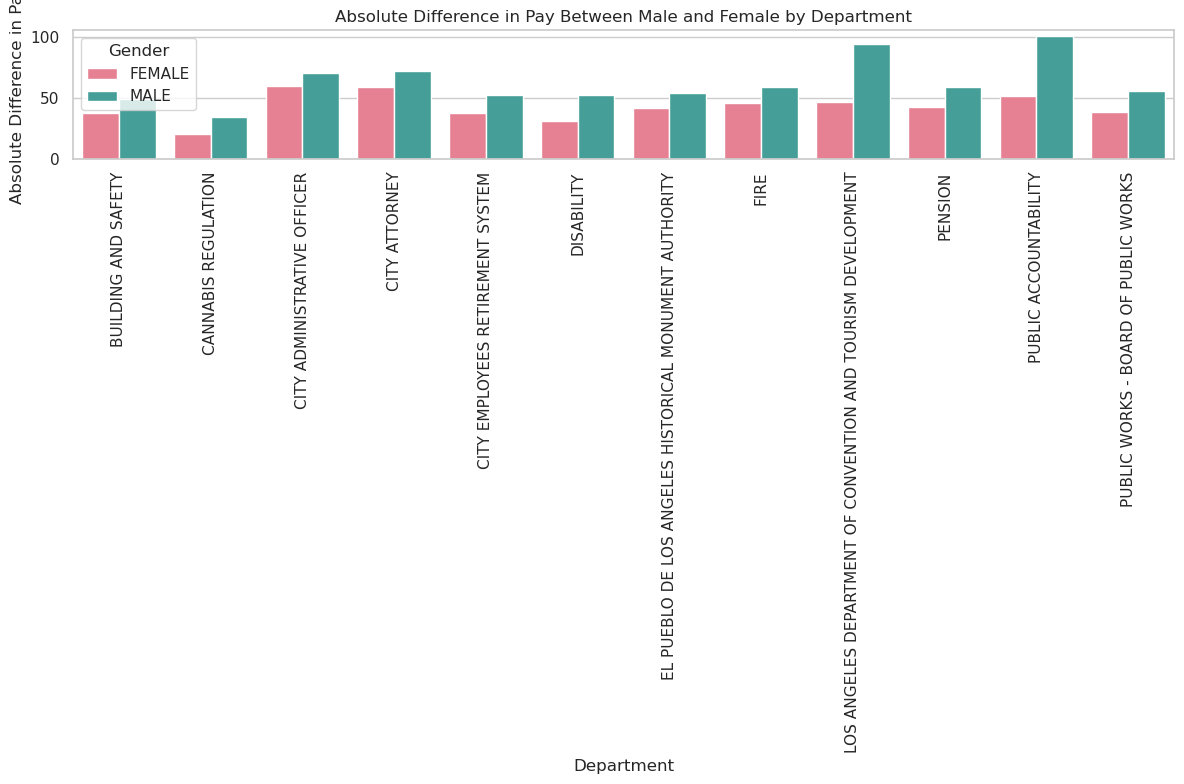

In [134]:
df = pd.DataFrame(avg_pay).T.reset_index()
df.columns = ['Department', 'Gender', 'ppl in group', 'Pay']

# Filter DataFrame for males and females separately
male_pay = df[df['Gender'] == 'MALE'].sort_values('Department')[['Department', 'Pay']]
female_pay = df[df['Gender'] == 'FEMALE'].sort_values('Department')[['Department', 'Pay']]

# Calculate the absolute difference in pay between male and female for each department
pay_difference = abs(male_pay.set_index('Department')['Pay'] - female_pay.set_index('Department')['Pay'])

# Convert the result to a DataFrame
pay_difference = pay_difference.reset_index()
pay_difference.columns = ['Department', 'Pay_Difference']

depts = pay_difference[pay_difference["Pay_Difference"] > 10]["Department"]

filtered_df = df[df['Department'].isin(depts)]


# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_df, x='Department', y='Pay', hue="Gender", palette='husl')
plt.xticks(rotation=90)
plt.title('Absolute Difference in Pay Between Male and Female by Department')
plt.xlabel('Department')
plt.ylabel('Absolute Difference in Pay')
plt.tight_layout()
plt.show()

In [147]:
grouped_df = cleaned_la_df.groupby(["fms_department_title", "ethnicity"])
avg_pay = {}
for group, group_data in grouped_df:
    avg_pay[group] = {"ppl in group" : len(group_data), "pay" : group_data["hourly_pay"].mean()}

In [148]:
avg_pay

{('AGING', 'ASIAN'): {'ppl in group': 13, 'pay': 41.547292060880295},
 ('AGING', 'BLACK'): {'ppl in group': 11, 'pay': 47.49090277102576},
 ('AGING', 'CAUCASIAN'): {'ppl in group': 5, 'pay': 47.311229946524065},
 ('AGING', 'FILIPINO'): {'ppl in group': 3, 'pay': 26.25828877005348},
 ('AGING', 'HISPANIC'): {'ppl in group': 9, 'pay': 57.28211408199643},
 ('AIRPORTS', 'AMERICAN INDIAN'): {'ppl in group': 10,
  'pay': 48.02408128342246},
 ('AIRPORTS', 'ASIAN'): {'ppl in group': 459, 'pay': 46.33610219845513},
 ('AIRPORTS', 'BLACK'): {'ppl in group': 1396, 'pay': 34.689864456123686},
 ('AIRPORTS', 'CAUCASIAN'): {'ppl in group': 774, 'pay': 47.075700134035294},
 ('AIRPORTS', 'FILIPINO'): {'ppl in group': 231, 'pay': 49.45120992198533},
 ('AIRPORTS', 'HISPANIC'): {'ppl in group': 1783, 'pay': 34.93195382714346},
 ('AIRPORTS', 'OTHER'): {'ppl in group': 13, 'pay': 28.421906622788978},
 ('AIRPORTS', 'TWO OR MORE RACES'): {'ppl in group': 3,
  'pay': 12.787449197860964},
 ('AIRPORTS', 'UNKNOWN')

In [138]:
avg_pay

{'AMERICAN INDIAN': {'ppl in group': 163, 'pay': 51.129307568649324},
 'ASIAN': {'ppl in group': 5899, 'pay': 50.2812239652692},
 'BLACK': {'ppl in group': 8964, 'pay': 41.63483541653244},
 'CAUCASIAN': {'ppl in group': 15521, 'pay': 52.47027106383726},
 'FILIPINO': {'ppl in group': 2523, 'pay': 46.044673584837675},
 'HISPANIC': {'ppl in group': 22033, 'pay': 44.16689925539499},
 'OTHER': {'ppl in group': 677, 'pay': 35.395918609151735},
 'PACIFIC ISLANDER': {'ppl in group': 2, 'pay': 29.19208556149733},
 'TWO OR MORE RACES': {'ppl in group': 20, 'pay': 22.9381628342246},
 'UNKNOWN': {'ppl in group': 88, 'pay': 45.917304265921246}}

In [152]:
df = pd.DataFrame.from_dict(avg_pay, orient="index").T
print(df)

df.columns = ['Department', 'Ethnicity', 'ppl in group', 'Pay']

gender_groups = df.pivot(index='Department', columns='Ethnicity', values='Pay')

# Calculate the absolute difference in pay between genders for each department
pay_difference = gender_groups.max(axis=1) - gender_groups.min(axis=1)

pay_difference = pay_difference.reset_index()

pay_difference.columns = ['Department', 'Pay_Difference']


depts = pay_difference[pay_difference["Pay_Difference"] > 10]["Department"]

filtered_df = df[df['Department'].isin(depts)]


# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_df, x='Department', y='Pay', hue="Gender", palette='husl')
plt.xticks(rotation=90)
plt.title('Absolute Difference in Pay Between Male and Female by Department')
plt.xlabel('Department')
plt.ylabel('Absolute Difference in Pay')
plt.tight_layout()
plt.show()

                  AGING                                             \
                  ASIAN      BLACK CAUCASIAN   FILIPINO   HISPANIC   
ppl in group  13.000000  11.000000   5.00000   3.000000   9.000000   
pay           41.547292  47.490903  47.31123  26.258289  57.282114   

                    AIRPORTS                                                \
             AMERICAN INDIAN       ASIAN        BLACK CAUCASIAN   FILIPINO   
ppl in group       10.000000  459.000000  1396.000000  774.0000  231.00000   
pay                48.024081   46.336102    34.689864   47.0757   49.45121   

              ... TRANSPORTATION                                               \
              ...      CAUCASIAN   FILIPINO    HISPANIC      OTHER    UNKNOWN   
ppl in group  ...     304.000000  98.000000  718.000000  49.000000  13.000000   
pay           ...      45.966735  39.236783   35.733719  37.189575  42.177584   

                    ZOO                                               
          

ValueError: Length mismatch: Expected axis has 266 elements, new values have 4 elements

In [ ]:
# SEATTLE:

In [50]:
grouped_df = dep_val.groupby("gender")
avg_pay = {}
for group, group_data in grouped_df:
    avg_pay[group] = {"ppl in group" : len(group_data), "pay" : group_data["Hourly Rate "].mean()}

In [51]:
avg_pay

{'andy': {'ppl in group': 211, 'pay': 52.49795971563981},
 'female': {'ppl in group': 3980, 'pay': 51.577487889447234},
 'male': {'ppl in group': 6882, 'pay': 53.79214190642255},
 'unknown': {'ppl in group': 1654, 'pay': 47.72853264812576}}

# The correlation between Ethnicity and Wage in the Los Angeles City Employee Payroll Database.

# Which are the departments with higher income in the Los Angeles City Employee Payroll Database?

# How do salary levels compare between equivalent departments in Los Angeles and Seattle, given their status as major West Coast cities with similar minimum wage rates?

# What does the wage's distribution in each department look like in the bar graph in the Los Angeles City Employee Payroll Database?